# Задание 4. Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
D = np.loadtxt('/Users/petrovich/Desktop/7 семестр/Классификация документов/Practice/data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

In [158]:
np.set_printoptions(threshold=300)
print(f"Матрица признаков: {X.shape} \n", X)
print(f"\n Целевой вектор: {Y.shape} \n", Y)

Матрица признаков: (1000, 4) 
 [[  9.31  -17.043  20.807  11.109]
 [ -6.446 -12.46  -12.941 -14.715]
 [ 14.324  -9.624  29.533   1.439]
 ...
 [  3.56    2.063   7.302  -7.817]
 [ 11.841 -14.315  23.148  11.777]
 [ -3.345 -15.219  -4.751  -1.141]]

 Целевой вектор: (1000,) 
 [-165.864  -49.048 -161.183 ...    6.194 -167.982  -95.613]


При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

##### 1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 

In [159]:
def MSE(Y, Y_pred):
    return ((Y - Y_pred)**2 ).mean()

In [160]:
alphas = np.linspace(-5, 5, 41)

In [161]:
def func(X, Y, X_pred, alpha):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(X.shape[1])) @ X.T @ Y
    Y_pred = theta @ X_pred.T
    return Y_pred

Text(0, 0.5, 'Среднеквадратичная ошибка')

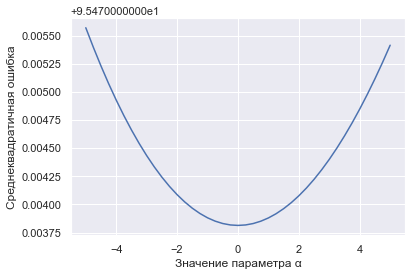

In [162]:
all_MSE = [MSE(Y, func(X, Y, X, alpha)) for alpha in alphas]

sns.set_theme()
plt.plot(alphas, all_MSE)
plt.xlabel('Значение параметра \u03B1')
plt.ylabel('Среднеквадратичная ошибка')

##### 2. Подготовьте исходные данные для 5 fold CV.

In [163]:
def CV(X, Y, folds = 5, inform=False):
    splits = np.intc(np.linspace(0, X.shape[0], folds+1))

    for i in range(len(splits)-1):
        X_train = np.vstack([X[ : splits[i]], X[splits[i+1] : ]])
        Y_train = np.hstack([Y[ : splits[i]], Y[splits[i+1] : ]])
        X_val = X[splits[i] : splits[i+1]]
        Y_val = Y[splits[i] : splits[i+1]]

        if inform == True:
            print(f"Индексы валидационной выборки: {splits[i]}-{splits[i+1]}.")

        yield X_train, Y_train, X_val, Y_val

In [164]:
make_CV = CV(X, Y, 5, True)
for folds in make_CV:
    print("Тренировочное множество: ", folds[0].shape, folds[1].shape)
    print("Валидационное множество: ", folds[2].shape, folds[3].shape, "\n")

Индексы валидационной выборки: 0-200.
Тренировочное множество:  (800, 4) (800,)
Валидационное множество:  (200, 4) (200,) 

Индексы валидационной выборки: 200-400.
Тренировочное множество:  (800, 4) (800,)
Валидационное множество:  (200, 4) (200,) 

Индексы валидационной выборки: 400-600.
Тренировочное множество:  (800, 4) (800,)
Валидационное множество:  (200, 4) (200,) 

Индексы валидационной выборки: 600-800.
Тренировочное множество:  (800, 4) (800,)
Валидационное множество:  (200, 4) (200,) 

Индексы валидационной выборки: 800-1000.
Тренировочное множество:  (800, 4) (800,)
Валидационное множество:  (200, 4) (200,) 



##### 3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.

In [165]:
alphas = np.linspace(-50, 50, 500)
 
def GridSearchCV(model, alphas, folds=5):
    MSE_train = []
    MSE_val = []

    for alpha in alphas:
        mse_train = []
        mse_val = []

        for (X_train, Y_train, X_val, Y_val) in CV(X, Y, folds):
            Y_train_pred = model(X_train, Y_train, X_train, alpha)
            Y_val_pred = model(X_train, Y_train, X_val, alpha)

            mse_train.append(MSE(Y_train, Y_train_pred))
            mse_val.append(MSE(Y_val, Y_val_pred))

        MSE_train.append(sum(mse_train)/len(mse_train))
        MSE_val.append(sum(mse_val)/len(mse_val))

    print("Оптимальный тренировочный параметр \u03B1 =", alphas[np.argmin(MSE_train)])
    print("Оптимальный валидационный параметр \u03B1 =", alphas[np.argmin(MSE_val)])

    return MSE_train, MSE_val, alphas[np.argmin(MSE_val)]

In [166]:
MSE_train, MSE_val, best_alpha = GridSearchCV(func, alphas)

Оптимальный тренировочный параметр α = 0.10020040080160442
Оптимальный валидационный параметр α = 3.9078156312625296


##### 4. Постройте валидационную кривую.

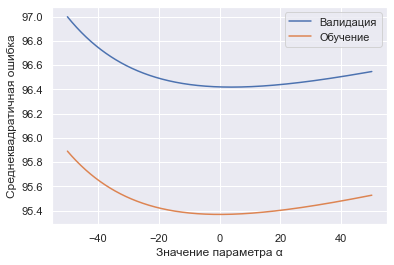

In [167]:
plt.plot(alphas, MSE_val, label='Валидация')
plt.plot(alphas, MSE_train, label='Обучение')
plt.xlabel('Значение параметра \u03B1')
plt.ylabel('Среднеквадратичная ошибка')
plt.legend()

##### 5. Постройте кривую обучения.

In [168]:
size = np.intc(np.linspace(30, 900, 60))
X_val = X[900:]
Y_val = Y[900:]

MSE_train = []
MSE_val = []

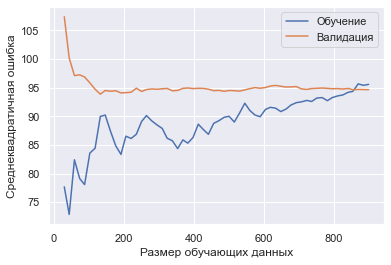

In [169]:
for s in size:
    X_train = X[:s]
    Y_train = Y[:s]

    Y_train_pred = func(X_train, Y_train, X_train, best_alpha)
    Y_val_pred = func(X_train, Y_train, X_val, best_alpha)

    MSE_train.append(MSE(Y_train, Y_train_pred))
    MSE_val.append(MSE(Y_val, Y_val_pred))

plt.plot(size, MSE_train, label = 'Обучение')
plt.plot(size, MSE_val, label = 'Валидация')
plt.xlabel('Размер обучающих данных')
plt.ylabel('Среднеквадратичная ошибка')
plt.legend()